# Retrieval and analysis of online wiki data
In this project we practice extracting online data. We will use video game data to keep things fun!

Fallout: New Vegas is one of the best roleplaying games ever made. It has a well documented "wiki" website, where the data for all the game's weapons, armors, and other objects is maintained. Using pandas, we can load this data and play with it.

## Retrieving weapon data
The page containing the weapon information is located [here](https://fallout.fandom.com/wiki/Fallout:_New_Vegas_weapons). Let's load the tables within it using pandas' read html method and see what we get.

In [1]:
import pandas as pd
url = "https://fallout.fandom.com/wiki/Fallout:_New_Vegas_weapons"
table_list = pd.read_html(url)
table_list

[    0                                                  1
 0 NaN  For an overview of unique weapons in Fallout: ...,
                                                    0
 0  v·d·eFallout: New Vegas overviews  Achievement...,
                    v·d·eFallout: New Vegas overviews
 0  Achievements  Add-ons  Patches  Bugs  Challeng...,
                                                    0   1  \
 0  Achievements  Add-ons  Patches  Bugs  Challeng... NaN   
 
                                                    2   3  \
 0  Items  Ammunition  Armor & clothing  Caravan c... NaN   
 
                                                    4  
 0  Locations  Test cells  Quests  Radio stations ...  ,
                                                    0
 0  This page lists all weapons in Fallout: New Ve...
 1  The content is not described in full detail on...,
                                                Legend
 0   - Damage: This information comes straight from...
 1   - Damage per second: The m

By inspecting the page source code, we can narrow down the tables we are interested in to the ones containing relevant data, using class tags.

In [2]:
url = "https://fallout.fandom.com/wiki/Fallout:_New_Vegas_weapons"
table_list = pd.read_html(url, attrs = {'class': 'va-table va-table-full va-table-center sortable'})
table_list

[    Image                    Unnamed: 1  Unnamed: 2  Unnamed: 3  Unnamed: 4  \
 0     NaN         .357 Magnum revolver²          26        45.5        1.75   
 1     NaN                        Lucky²          30        82.5        2.75   
 2     NaN          .44 Magnum revolver²          36        67.5        1.88   
 3     NaN            Mysterious Magnum²          42       102.4        2.44   
 4     NaN              .45 Auto pistol²          29        79.8        2.75   
 5     NaN  A Light Shining in Darkness²          33       144.4        4.38   
 6     NaN                5.56mm pistol²          28        77.0        2.75   
 7     NaN                      That Gun          30        90.0        3.00   
 8     NaN                   9mm pistol²          16        50.0        3.13   
 9     NaN                        Maria²          20        75.0        3.75   
 10    NaN                  10mm pistol²          22        60.5        2.75   
 11    NaN         Weathered 10mm pistol

Much better! We only have actual weapon tables. Let's explore the dimensions of these tables.

In [3]:
for table in table_list:
    print(table.iloc[0,1], table.shape)

.357 Magnum revolver² (18, 19)
Anti-materiel rifle¹(GRA) (25, 19)
.45 Auto SMG (8, 19)
Caravan shotgun (9, 19)
K9000 cyberdog gun¹ (5, 19)
Alien blaster¹ (17, 19)
Gauss rifle² (15, 19)
Arc welder (12, 19)
25mm grenade APW (14, 18)
Dynamite² (12, 14)
Bottlecap mine² (14, 12)
Bowie knife² (33, 16)
9 iron (21, 16)
Proton throwing axe² (7, 16)
Ballistic fist (33, 16)
Big Mountain Transportalponder! (4, 19)
Deathclaw gauntlet (15, 19)
Arcade Gannon's Ripper (17, 19)


## Cleaning and combining the data

Most tables have the same columns, except for explosives and placed weapons which have an area of effect column. Melee weapons are missing weapon spread, ammo type, and mag size.

We don't need the last three tables on the list, since they contain unavailable weapons in the game.

Let's combine all these into a single table for all weapons.

In [4]:
col_names_guns = ['name', 
             'dmg', 
             'dps', 
             'rof', 
             'crit_mult', 
             'crit_dmg', 
             'ap_cost', 
             'dpap', 
             'spread', 
             'ammo', 
             'mag_size', 
             'durability', 
             'weight',
             'value',
             'vtw',
             'skill',
             'strength']

col_names_melee = ['name', 
             'dmg', 
             'dps', 
             'rof', 
             'crit_mult', 
             'crit_dmg', 
             'ap_cost', 
             'dpap', 
             'durability', 
             'weight',
             'value',
             'vtw',
             'skill',
             'strength']

weapon_types =['Pistol', 'Rifle', 'SMG', 'Shotgun', 'Heavy', 'Energy Pistol', 'Energy Rifle', 'Energy Heavy', 'Bladed', 'Blunt', 'Thrown', 'Unarmed']
i = 0
combined_table = pd.DataFrame()
for table in table_list[:-3]:
    new_table = table.drop(['Image', 'Base ID'], axis=1)
    if new_table.shape[1] == 17:
        new_table.columns = col_names_guns
#         print(new_table.iloc[0]['name'], new_table.shape[1], weapon_types[i])
        new_table['type'] = weapon_types[i]
        i+=1
        combined_table = pd.concat([combined_table, new_table])
    elif new_table.shape[1] == 14:
        new_table.columns = col_names_melee
#         print(new_table.iloc[0]['name'], new_table.shape[1], weapon_types[i])
        new_table['type'] = weapon_types[i]
        i+=1
        combined_table = pd.concat([combined_table, new_table])

combined_table = combined_table.set_index('name')
combined_table

C:\Users\Lourenco\Anaconda3\lib\site-packages\ipykernel_launcher.py:50: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



,ammo,ap_cost,crit_dmg,crit_mult,dmg,dpap,dps,durability,mag_size,rof,skill,spread,strength,type,value,vtw,weight
name,,,,,,,,,,,,,,,,,
.357 Magnum revolver²,.357 Magnum round,26,26,x1,26,1,45.5,995,6,1.75,0,0.500,3,Pistol,110,55.0,2.00
Lucky²,.357 Magnum round,17,30,x2.5,30,1.76,82.5,1120,6,2.75,0,0.300,3,Pistol,1500,600.0,2.50
.44 Magnum revolver²,.44 Magnum round,25,36,x1,36,1.44,67.5,1245,6,1.88,50,0.700,5,Pistol,2500,714.3,3.50
Mysterious Magnum²,.44 Magnum round,22,42,x1,42,1.91,102.4,745,6,2.44,50,0.500,6,Pistol,3200,800.0,4.00
.45 Auto pistol²,.45 Auto,17,29,x1,29,1.7,79.8,745,7,2.75,25,0.800,3,Pistol,1750,1166.7,1.50
A Light Shining in Darkness²,.45 Auto,15,33,x2,33,2.2,144.4,1245,6,4.38,75,0.550,3,Pistol,4500,3750.0,1.20
5.56mm pistol²,5.56mm round,21,28,x2,28,1.33,77.0,870,5,2.75,50,0.600,6,Pistol,1200,240.0,5.00
That Gun,5.56mm round,19,30,x2.5,30,1.58,90.0,1120,5,3.00,50,0.500,6,Pistol,1750,350.0,5.00
9mm pistol²,9mm round,17,16,x1,16,0.94,50.0,745,13,3.13,0,0.700,2,Pistol,100,66.7,1.50


## Analyzing the weapon data
### Weapon categories
Let's find out how the weapon categories compare to their real stats. Are categories properly clustered together?
We will use a plot of dps vs spread, which should indicate how "good" a weapon is.

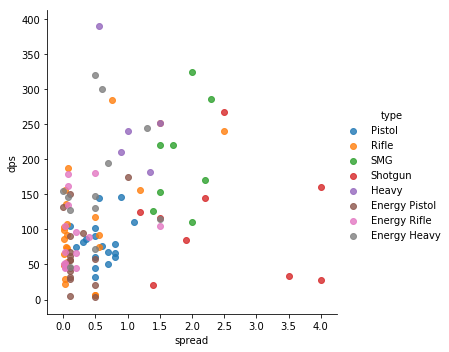

In [6]:
%matplotlib inline
import seaborn as sns
sns.lmplot('spread', 'dps', data=combined_table.dropna(), hue='type', fit_reg=False)

We can see that there is no clear clusters in the data. Pistols and SMGs are the only categories that have close values in terms of spread, but their dps vary a lot.
### Ammo types
Let's see if the ammo a weapon uses correlates with its dps.

Text(0, 0.5, 'Average DPS')

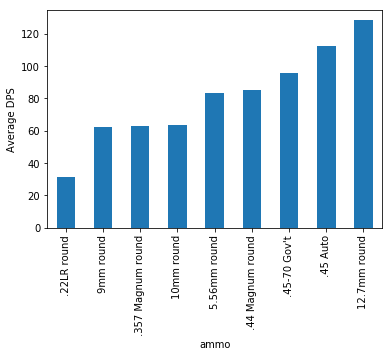

In [11]:
import matplotlib.pyplot as plt
combined_table[combined_table['type']=='Pistol'].pivot(columns='ammo', values='dps').mean().sort_values().plot.bar()
plt.ylabel('Average DPS')

As expected, there is a large relationship between the ammo type and the average DPS of the weapons using it.

## Analyzing perk requirements
The player can select a number of perks upon levelling up. These perks might have requirements of certain attributes or skills. This information is not always easy to know ahead. Let's see if we can make it easier.

In [12]:
url = "https://fallout.fandom.com/wiki/Fallout:_New_Vegas_perks"
table_list = pd.read_html(url)
combined_table = pd.DataFrame()
for table in table_list:
    if table.shape[1] == 6:
        combined_table = pd.concat([combined_table, table])

combined_table = combined_table.drop('Base ID', axis=1)
combined_table['Other requirements'] = combined_table['Other requirements'].fillna('None')
combined_table

,Name,Level req,Other requirements,Ranks,Benefit
0,Black WidowLady Killer,2,None,1,+10% damage to the opposite sex and unique dia...
1,Cherchez La FemmeConfirmed Bachelor,2,None,1,+10% damage to the same sex and unique dialogu...
2,Friend of the Night,2,"PE 6, Sneak 30",1,Your eyes adapt quickly to low-light conditions.
3,"Heave, Ho!",2,"ST 5, Explosives 30",1,+50% thrown weapon velocity and range.
4,Hunter,2,Survival 30,1,"In combat, you do 75% more critical damage aga..."
5,Intense Training,2,None,10,You can put a single point into any of your SP...
6,Rapid Reload,2,"AG 5, Guns 30",1,All of your weapon reloads are 25% faster than...
7,Retention,2,IN 5,1,Skill magazines last for 3 real-time minutes.
8,Swift Learner,2,IN 4,3,You gain an additional 10% whenever experience...
9,Cannibal,4,None,1,"When you're in Sneak mode, you gain the option..."


### Identifying perks that have an "Intelligence" attribute requirement

In [13]:
combined_table[combined_table['Other requirements'].str.contains('IN')]

,Name,Level req,Other requirements,Ranks,Benefit
7,Retention,2,IN 5,1,Skill magazines last for 3 real-time minutes.
8,Swift Learner,2,IN 4,3,You gain an additional 10% whenever experience...
10,Comprehension,4,IN 4,1,You gain one additional skill point for readin...
11,Educated,4,IN 4,1,You gain two more skill points every time you ...
12,Entomologist,4,"IN 4, Survival 45",1,You do an additional 50% damage every time you...
30,Pack Rat,8,"IN 5, Barter 70",1,Items with a weight of two pounds or less now ...
45,Nerd Rage!,10,"IN 5, Science 50",1,+15 DT and Strength increased to 10 whenever h...
72,Computer Whiz,18,"IN 7, Science 70",1,Can make one extra attempt to hack a locked-do...
7,Lessons Learned,26,IN 6,1,+1% XP gain per player level.
11,Voracious Reader,22,IN 7,1,Damaged books become blank magazines; can copy...


### Identifying perks that have an "Explosives" skill requirement

In [14]:
combined_table[combined_table['Other requirements'].str.contains('Explosives')]

,Name,Level req,Other requirements,Ranks,Benefit
3,"Heave, Ho!",2,"ST 5, Explosives 30",1,+50% thrown weapon velocity and range.
17,Demolition Expert,6,Explosives 50,3,+20% damage with explosives.
50,Hit the Deck,12,Explosives 70,1,+25 DT against explosives.
54,Pyromaniac,12,Explosives 60,1,+50% damage with fire-based weapons.
58,Splash Damage,12,Explosives 70,1,Explosives have a 25% larger area of effect.
2,Grunt,8,"Guns 45, Explosives 20",1,"25% more damage with 9mm pistols and SMGs, .45..."
0,Mad Bomber,6,"Repair 45, Explosives 45",1,Enables you to create special explosive recipe...
